In [0]:
# This is an implementation of a neural network from scratch to solve a classification problem

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

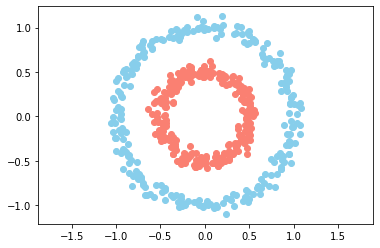

In [2]:
# Creating the dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [0]:
# Neural layer class
# Specifies the number of connections (n_conn), the number of neurons in this layer (n_neur) and finally the activation function (act_f)
# After that we create the weights and bias randomly
class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1 # bias range -1 to 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1 

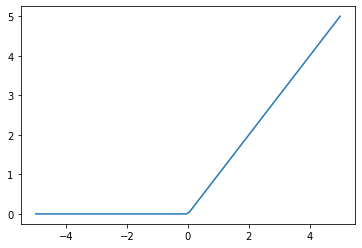

In [6]:
# Activation functions

# the second argument is the derivative, for when we do backpropagation
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [0]:
# Creating the layers

# topology is a hardcoded vector with the number of neurons in each layer
def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn

In [10]:
# training the neural network

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)  

# anonymous function that calculates MSE
# the second argument is the derivative again
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))



def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  # vector used to  store the previous values of weights and values to operate with them during the forward pass
  out = [(None, X)]
  
  # Forward pass
  for l, layer in enumerate(neural_net):
  
    # sum of all weights times the values plus the bias
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b

    # passing the result to the activation function
    a = neural_net[l].act_f[0](z)
  
    out.append((z, a))
    
  
  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      # if we're on the last layer calculate the derivative of the error function times derivative of the activation function in the last layer
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      
      # else calculate delta in terms of the previous layer
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
       
       # Temporary storage of the weights to be able to perform calculations with them later
      _W = neural_net[l].W
 
      # Gradient descent
      ''' 
        For the bias, we substract the mean of all deltas and multiply by the learning rate
        For the weights, we substract it by the multiplication of all deltas by the activation of the previos layer, and then multiply by the learning rate
      '''
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  # return the predicted value    
  return out[-1][1]
  
  
train(neural_net, X, Y, l2_cost, 0.5)
print("")

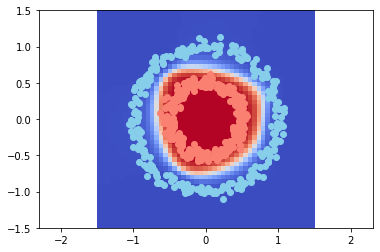

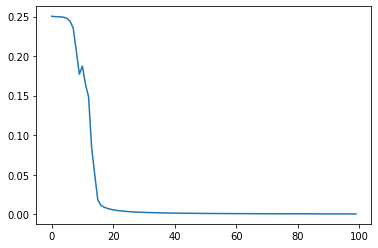

In [11]:
# Visualization and test

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Training the neural network
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    # plotting the class predictions with the colors red and blue
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()

    # plotting the loss to visualize how it is descending
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  